# Goal

Here we are going to make histograms of N_(band) for each region, so that the "official star counter" can be based on something sensible.

We are operating upon the cleaned data of Aug 2020.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

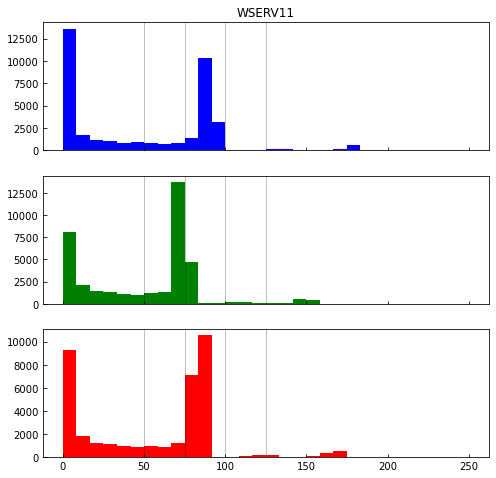

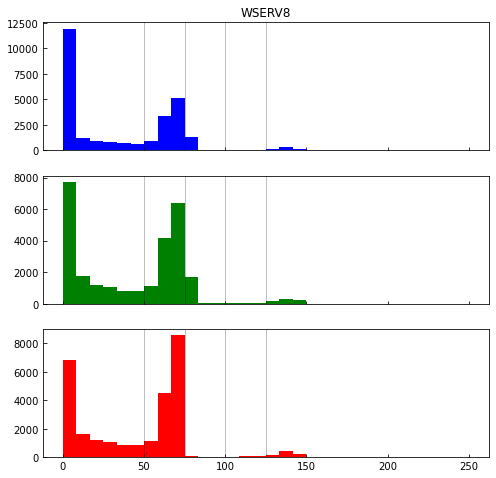

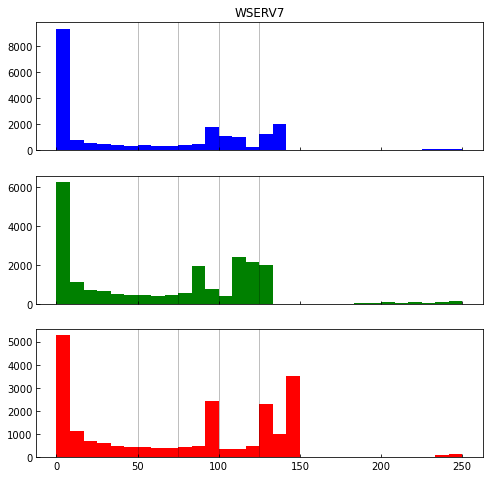

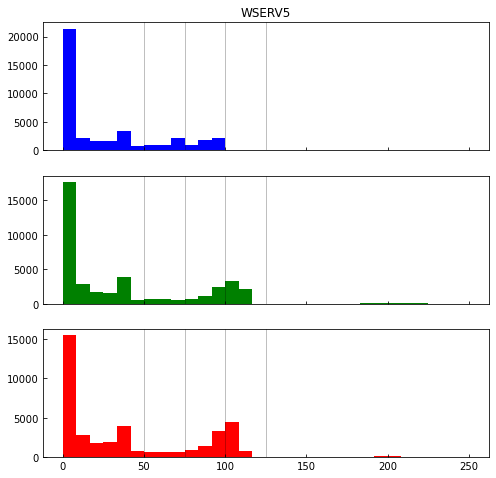

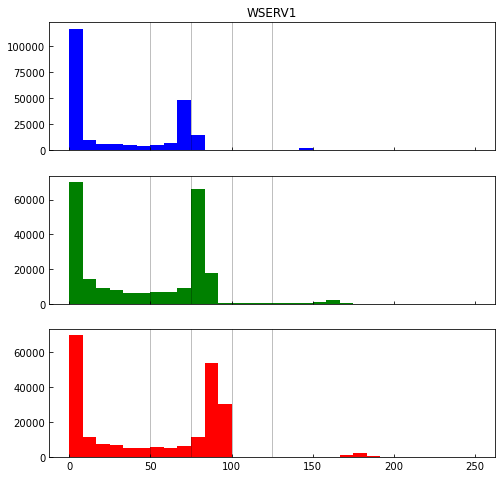

In [3]:
wserv_ids = [1, 5, 7, 8, 11]

output_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"

for wserv in wserv_ids[::-1]:

    output_path = os.path.join(
        output_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )
    if wserv==5:
        output_path = os.path.join(
            output_root, 
            "wserv5_v2012",
            f"WSERV{str(wserv)}_fdece_graded_clipped0.8_scrubbed0.1_dusted0.5_summary_spreadsheet.h5")


    ds = pd.read_hdf(output_path, key='table')
    
    fig, axes = plt.subplots(3, sharex=True, figsize=(8,8))
    
    axes[0].hist(ds['count']['N_J'], color='b', bins=30, range=(0,250))
    axes[1].hist(ds['count']['N_H'], color='g', bins=30, range=(0,250))
    axes[2].hist(ds['count']['N_K'], color='r', bins=30, range=(0,250))
#     axes[1].plot(ds['median']['HAPERMAG3'][q2_all_indices], ds['std']['HAPERMAG3'][q2_all_indices], 'g,')
#     axes[2].plot(ds['median']['KAPERMAG3'][q2_all_indices], ds['std']['KAPERMAG3'][q2_all_indices], 'r,')

    for ax, band in zip(axes, ["J", "H", "K"]):
        ax.axvline(50, color='k', alpha=0.5, lw=0.5)
        ax.axvline(75, color='k', alpha=0.5, lw=0.5)
        ax.axvline(100, color='k', alpha=0.5, lw=0.5)
        ax.axvline(125, color='k', alpha=0.5, lw=0.5)
#         ax.set_ylim(0, 0.195)

#         ax.set_ylabel(f"{band} standard deviation")
        ax.tick_params(direction='in')
        
#     axes[2].set_xlabel("Median magnitude")
    axes[0].set_title(f"WSERV{wserv}")
    

ValueError: cannot convert float NaN to integer

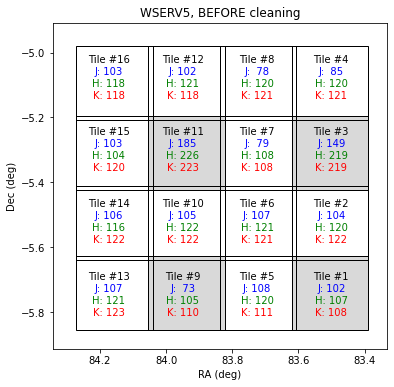

In [5]:
from wuvars.diagnostics.tile_maps_pd import f_observing_map

# wserv_ids = [1, 5, 7, 8, 11]
wserv_ids = [5]

raw_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/Raw_Downloads"
input_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/reduction_artifacts/"
output_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"

for wserv in wserv_ids[::-1]:
    
    raw_path = os.path.join(raw_root, f"WSERV{str(wserv)}.fits.gz",)

    input_path = os.path.join(
        input_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5.h5",
    )

    spread_raw_path = os.path.join(
        output_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_uncleaned_summary_spreadsheet.h5",
    )
    output_path = os.path.join(
        output_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )

    raw_dat = astropy.table.Table.read(raw_path)
    clean_dat = astropy.table.Table.read(input_path)
    raw_ds = pd.read_hdf(spread_raw_path, key="table")
    clean_ds = pd.read_hdf(output_path, key='table')
    
    mapfig_raw = f_observing_map(raw_dat, raw_ds, min_nights)
    plt.title(f"WSERV{str(wserv)}, BEFORE cleaning")
    mapfig_clean = f_observing_map(clean_dat, clean_ds, min_nights)
    plt.title(f"WSERV{str(wserv)}, AFTER cleaning")
#     fig2 = f_observing_map(fulldata_cleaned, spread_cleaned)
    